# TASK 1: Problem Definition & Dataset Selection

## Problem Statement:
The goal of this project is to analyze a retail store’s sales data to identify trends in customer purchasing behavior, top-selling categories and items, payment method preferences, and overall sales performance.
The analysis will help the business make data-driven decisions for inventory management, marketing strategies, and customer targeting.

## Domain:
Retail and E-commerce.

## Dataset Description:
The dataset contains detailed transaction records from a retail store with the following columns:

Transaction ID: Unique identifier for each transaction
Customer ID: Unique identifier for each customer
Category: Type of item purchased
Item: Name of the purchased item
Price Per Unit: Price of one item
Quantity: Number of items purchased
Total Spent: Total cost per transaction
Payment Method: Mode of payment used
Location: In-Store/Online
Transaction Date: Date of purchase
Discount Applied: Whether a discount was applied (True/False)

## Dataset Quality:

Contains both categorical and numerical variables.
Over thousands of rows, ensuring good sample size.

# TASK 2:Data Cleaning and Preprocessing

### Steps Performed:

## 1.Handled Missing Values:
* Filled missing values in Item with "Unknown Item".
* Filled missing Price Per Unit, Quantity, and Total Spent with median/mode values.
* Filled missing Discount Applied values with "False".

## 2.Removed Duplicates:
* Checked for duplicate Transaction ID and removed them.

## 3.Corrected Data Types:
* Converted Transaction Date to datetime format.

## 4.Created Derived Columns:
* Month extracted from Transaction Date for time-based analysis.

## 5.Filtered Data:
* Removed rows with invalid or zero quantity.

### 1. Data Loading and Initial Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset
df = pd.read_csv("retail_store_sales.csv")

# Display first few rows
df.head()

# Dataset info
df.info()

# Basic statistics
df.describe()

# Shape of the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB
Rows: 12575
Columns: 11


### Data Pre-processing

In [3]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [9]:
df = df.fillna({
    'Item': 'Unknown',
    'Price Per Unit': df['Price Per Unit'].median(),
    'Quantity': df['Quantity'].mode()[0],
    'Discount Applied': False
})
df.loc[df['Total Spent'].isna(),'Total Spent']=(df['Price Per Unit']*df['Quantity'])

In [10]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [12]:
df.duplicated().sum
df.drop_duplicates(inplace=True)

In [4]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

In [7]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%d-%m-%Y', errors='coerce')

In [8]:
df.dtypes

Transaction ID              object
Customer ID                 object
Category                    object
Item                        object
Price Per Unit             float64
Quantity                   float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
Discount Applied            object
dtype: object

In [9]:
# creating derived columns
df['Month']=df['Transaction Date'].dt.month

In [11]:
# filtering or aggregating data(summarizing)

# Remove rows with invalid numbers
df = df[(df['Price Per Unit'] > 0) & (df['Quantity'] > 0)]

In [13]:
# aggregation 
# total spent per customer
customer_summary = df.groupby('Customer ID')['Total Spent'].sum().reset_index()
print("Customer Summary:")
display(customer_summary.head())

# total spent per location
location_summary = df.groupby('Location')['Total Spent'].sum().reset_index()
print("Location Summary:")
display(location_summary.head())

Customer Summary:


,Customer ID,Total Spent
0,CUST_01,55908.0
1,CUST_02,59512.5
2,CUST_03,57150.0
3,CUST_04,57959.0
4,CUST_05,63855.5


Location Summary:


,Location,Total Spent
0,In-store,723567.5
1,Online,749431.0


# TASK 3: EDA & Visualizations

## Exploratory Analysis Performed:

#### Univariate Analysis
* Key statistics for three numeric columns
* Descriptive statistics for the categorical columns
* Top 10 most frequent items from item column
* Frequency of different payment methods
* Frequency of transaction by their location type
* Bar plot showing the top 10 most frequently occuring items

#### Bivariate Analysis
* Calculate total spending per category
* Calculate the mean spenting per payment method
* Horizontal bar plot of total spending per category

#### Multivariate Analysis
* Calculate the sum of expenses for each combination of category and location
* The average spending for each combination of product category and payment method 

#### Correlation Analysis(numerical relationships)
* how numerical columns relate (eg.,does quantity affect total spent?)

#### Stastical Summaries
* Find the mean,median,and standard deviation of 'Total spent' column and the mean of 'Quantity' column

## Visualizations:
* Top 10 items sold
* Sales trend over time
* Payment method share
* Distribution of total spenting per transaction
* Detect outliers
* Correlation between numerical features
* Subplot
* Nimber of transactions with and without  discount
* Top 10 customers by total spending
* Most expensive category

### 3. Exploratory Data Analysis (EDA)

Univariate Analysis (single-column insights)

In [17]:
# For numeric columns
df.describe(include=[float])

,Price Per Unit,Quantity,Total Spent
count,11362.000000,11362.000000,11362.000000
mean,23.356847,5.535029,129.642537
std,10.736030,2.855166,94.662368
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,52.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [18]:
# For categorical columns
df.describe(include='object')

,Transaction ID,Customer ID,Category,Item,Payment Method,Location,Discount Applied
count,11362,11362,11362,11362,11362,11362,7579
unique,11362,25,8,200,3,2,2
top,TXN_2407494,CUST_05,Furniture,Item_2_BEV,Cash,Online,True
freq,1,497,1460,126,3917,5745,3801


In [20]:
# Most common items
df['Item'].value_counts().head(10)


Item
Item_2_BEV      126
Item_25_FUR     113
Item_11_FUR     110
Item_16_MILK    109
Item_1_MILK     109
Item_5_FUR      107
Item_20_BUT     107
Item_14_FOOD    106
Item_11_MILK    106
Item_19_CEA     106
Name: count, dtype: int64

In [21]:
# Most popular payment methods
df['Payment Method'].value_counts()

Payment Method
Cash              3917
Credit Card       3729
Digital Wallet    3716
Name: count, dtype: int64

In [22]:
# Transactions by location
df['Location'].value_counts().head()

Location
Online      5745
In-store    5617
Name: count, dtype: int64

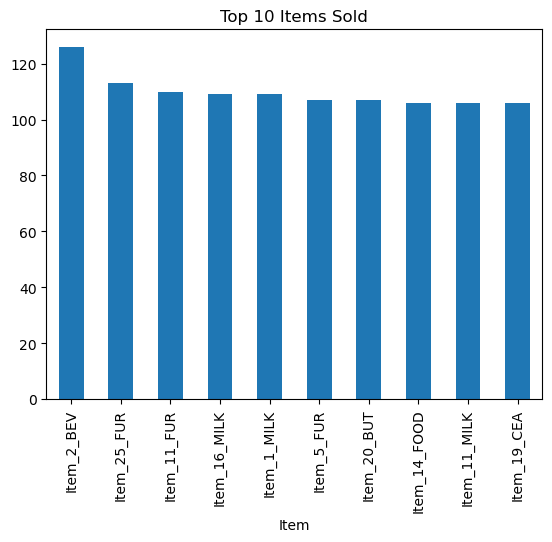

In [23]:
# Plot top 10 most sold items
df['Item'].value_counts().head(10).plot(kind='bar', title='Top 10 Items Sold')
plt.show()

Bivariate Analysis (two-column relationships)

In [27]:
# Category vs. Total Spent
df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

Category
Butchers                              197426.0
Electric household essentials         192441.5
Beverages                             187978.5
Furniture                             186527.0
Food                                  184645.0
Computers and electric accessories    180902.5
Patisserie                            172330.5
Milk Products                         170747.5
Name: Total Spent, dtype: float64

In [28]:
# Payment Method vs. Total Spent
df.groupby('Payment Method')['Total Spent'].mean()

Payment Method
Cash              131.140158
Credit Card       129.025208
Digital Wallet    128.683396
Name: Total Spent, dtype: float64

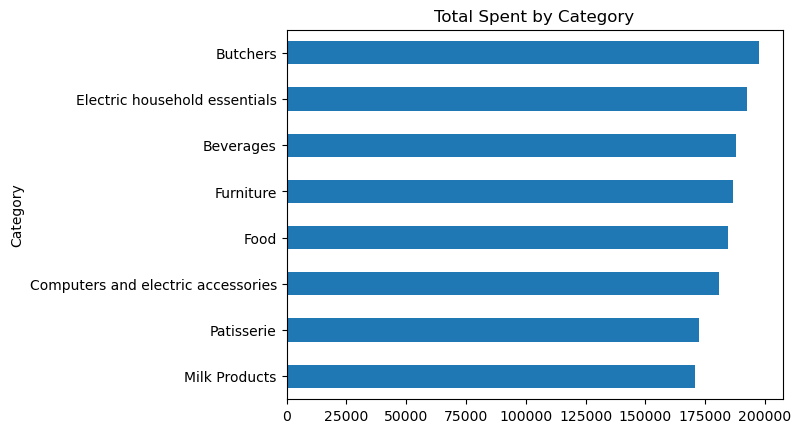

In [32]:
df.groupby('Category')['Total Spent'].sum().sort_values().plot(kind='barh', title='Total Spent by Category')
plt.show()

Multivariate Analysis (relationships among 3+ columns)

In [33]:
# Total Spent by Category and Location
pd.pivot_table(df, values='Total Spent', index='Category', columns='Location', aggfunc='sum')

Location,In-store,Online
Category,,
Beverages,93753.5,94225.0
Butchers,97626.0,99800.0
Computers and electric accessories,82653.5,98249.0
Electric household essentials,92338.5,100103.0
Food,90613.0,94032.0
Furniture,94896.0,91631.0
Milk Products,85582.5,85165.0
Patisserie,86104.5,86226.0


In [34]:
# Category, Payment Method, and Average Spending
pd.pivot_table(df, values='Total Spent', index='Category', columns='Payment Method', aggfunc='mean')

Payment Method,Cash,Credit Card,Digital Wallet
Category,,,
Beverages,127.855787,134.428899,133.593750
Butchers,145.742553,139.586000,131.117517
Computers and electric accessories,132.420082,127.183084,128.703620
Electric household essentials,131.065657,129.458705,140.822874
Food,131.360279,131.930617,125.131635
Furniture,131.769309,127.780083,123.675926
Milk Products,121.427386,117.121926,121.019780
Patisserie,127.983766,124.883260,124.735099


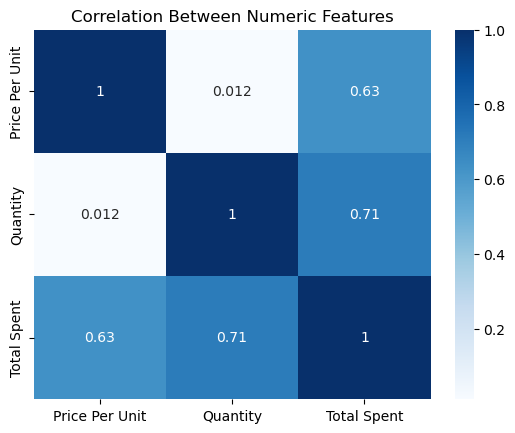

In [35]:
# Compute correlation
df[['Price Per Unit', 'Quantity', 'Total Spent']].corr()

# Optional: visualize correlation heatmap
sns.heatmap(df[['Price Per Unit', 'Quantity', 'Total Spent']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numeric Features')
plt.show()

In [36]:
print("Average total spent per transaction:", df['Total Spent'].mean())
print("Median total spent:", df['Total Spent'].median())
print("Standard deviation of spending:", df['Total Spent'].std())
print("Average quantity purchased:", df['Quantity'].mean())

Average total spent per transaction: 129.64253652525963
Median total spent: 108.5
Standard deviation of spending: 94.66236817183712
Average quantity purchased: 5.535029044182362


### 4. Visualizations

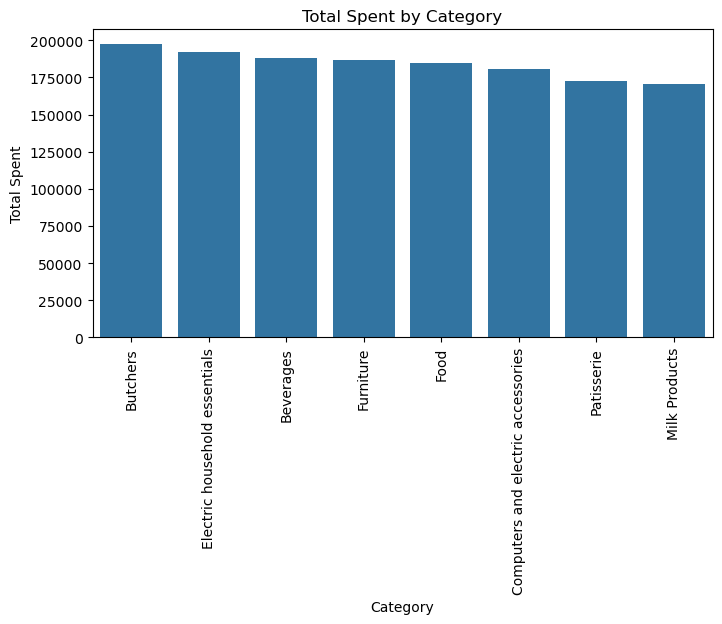

In [79]:
#Total Spent by Category
category_spent = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
#category_spent becomes a series showing total spending for each category,highest appears first

plt.figure(figsize=(8,4))
sns.barplot(x=category_spent.index, y=category_spent.values) #barplot using seaborn
plt.title('Total Spent by Category')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.show()

#### Summary:
* the above bar chart shows how much customers spent in each product category.
* the highest spending appears in catogories like Butchers and Electric household essentials.
* categories like Patisseri or Milk products have lower total spending.
* visual camparison of spending patterns across product categories.
#### Purpose:
* Helps indentify which product bring in most revenue.
* useful in EDA to understand cudtomer purchasing behavior.

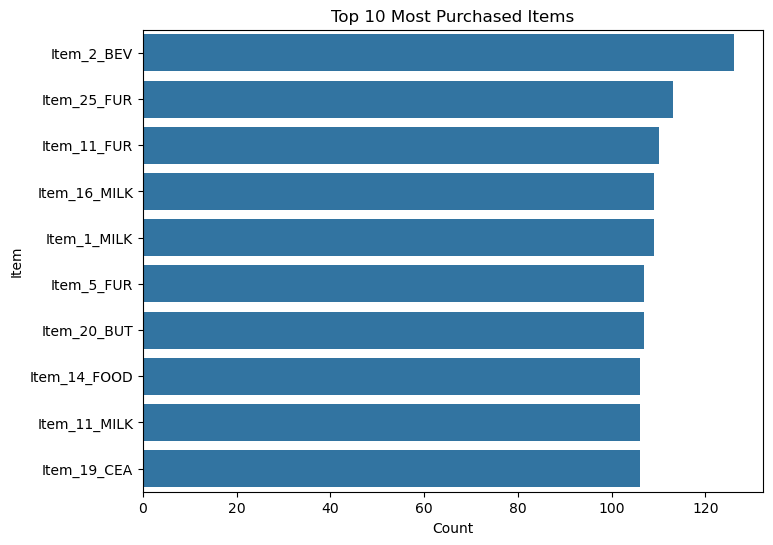

In [80]:
# Top 10 Items Sold
top_items = df['Item'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_items.values, y=top_items.index)  #horizontal barplot with seaborn
plt.title('Top 10 Most Purchased Items')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

#### Summary:
* shows the 10 items that purchased the most.
* Item_2_BEV and Item_25_FUR are among the top selling.
* items like Item_19_CEA are lower in top 10 ranking.
* easy to compare which items are most popular among customers.
#### Purpose:
* helps in best selling products- important for inventary and marketing decisions.
* useful for demand forcasting- know which items to stock more.
* highlight customer oreference and trends.
* These top-selling products could be used in promotional campaigns or bundled offers.

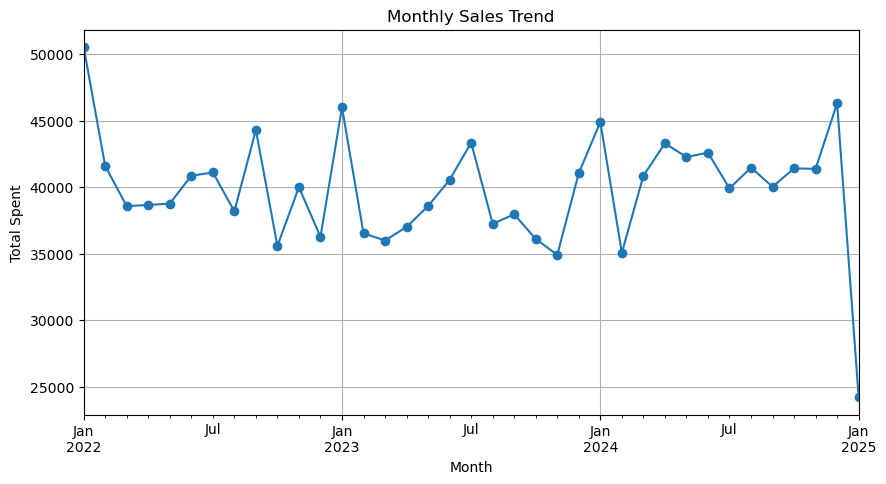

In [81]:
# Sales Trend Over Time
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])  #confirming datetime format
sales_trend = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum()
        #convert each date into month-year period,groups all transactions occured in same month,adds total spent of each month    
plt.figure(figsize=(10,5))
sales_trend.plot(kind='line', marker='o')          #lineplot with circular markers
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.grid(True)
plt.show()

#### Summary:
* gives a visual trend of total spending for each month
* shows total sales(total spent) changes month by month from jan 2022 to jan 2025
* sale highest in jan 2022 and lowest in jan 2025
* you can easily spot growth trends,seasonal spikes,or drops over time
#### Purpose:
* shows sales performance trends over months or year
* helps detects seasonality- if sales rise during festivals or holidays
* identify growth or decline pattern

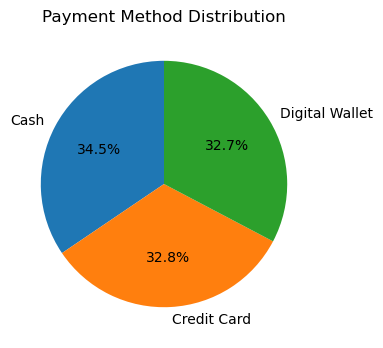

In [42]:
# Payment Method Share
payment_share = df['Payment Method'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(payment_share, labels=payment_share.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.show()

#### Summary:
* pie chart shows the percentage share of different payment methods used by customers.
* customers use all three payment methods almost equally,but cash has a slightly higher share.
#### Purpose:
* quickly shows the distribution of each payment method
* helps in understanding customer behavior- how they prefer to pay
* can be useful for business strategies like- increase support for popular method or encourage underused ones with offers or promotions

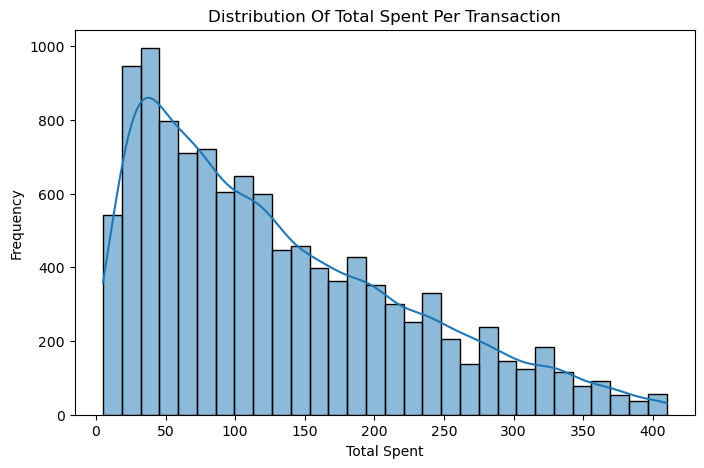

In [82]:
# Distribution of Spending
plt.figure(figsize=(8,5))
sns.histplot(df['Total Spent'], bins=30, kde=True)   #histogram with seaborn,total spent divide into 30 equal ranges,adds a kernal density estimate(KDE)line-smooth curvw showing probability density of data
plt.title('Distribution Of Total Spent Per Transaction')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

#### Summary:
* shows how transaction spending values are distributed
* most transaction fall in the range of 25-75
* few transactions have very low low or very high total spending
* KDE curve is positively skewed.
#### Purpose:
* shows whether spending data is normally distributed or skewed
* detects outliers- unusually high or low transaction amounts
* helps in understanding cutomer spending pattern

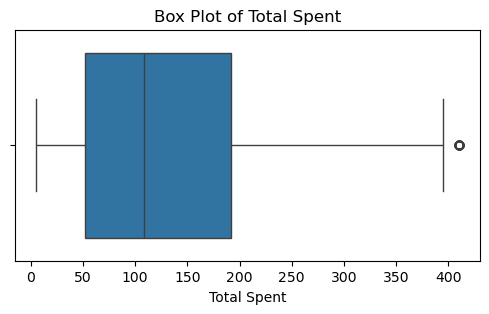

In [47]:
# Detect Outliers
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Total Spent'])
plt.title('Box Plot of Total Spent')
plt.show()

#### Summary:
* minimum value-approximately 10, first quartile(Q1)-appr 50[left edge of box], median(Q2)-appr 110[line inside the box],third quartile(Q3)-appr 200
  [right edge of box],maximum value-appr 380, outlier-appr 400
* majority of data concentrated between 50 and 200
* outliers- transaction with unusual high spending
#### Purpose:
* helps in data cleaning- outliers might need to be reviewed, corrected, or removed
* shows data spread in one graph
* detect outliers quickly
* If outliers valid, they might highlight high-value customers or large orders.

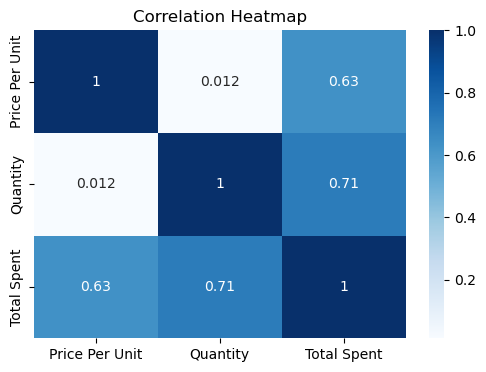

In [51]:
# Correlation Between Numeric Variables
plt.figure(figsize=(6,4))
sns.heatmap(df[['Price Per Unit', 'Quantity', 'Total Spent']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

#### Summary:
* shows statistical relationship between 3 variables
* diagonal cells- all have correlated coefficient of 1,indicating perfect positive correlation,variable is related to itself
* quantity vs Total Spent-postively correlated-0.71,means quantity of items increases,the amount spent generally increases significantly
* price per unit vs total spent-postive-0.63,total spend increase with increase in price per unit
* price per unit vs quantity-weak-0.012,linear relationship
#### Purpose:
* shows relationship between multiple numeric variable
* helps odentifying which features are strongly correlated

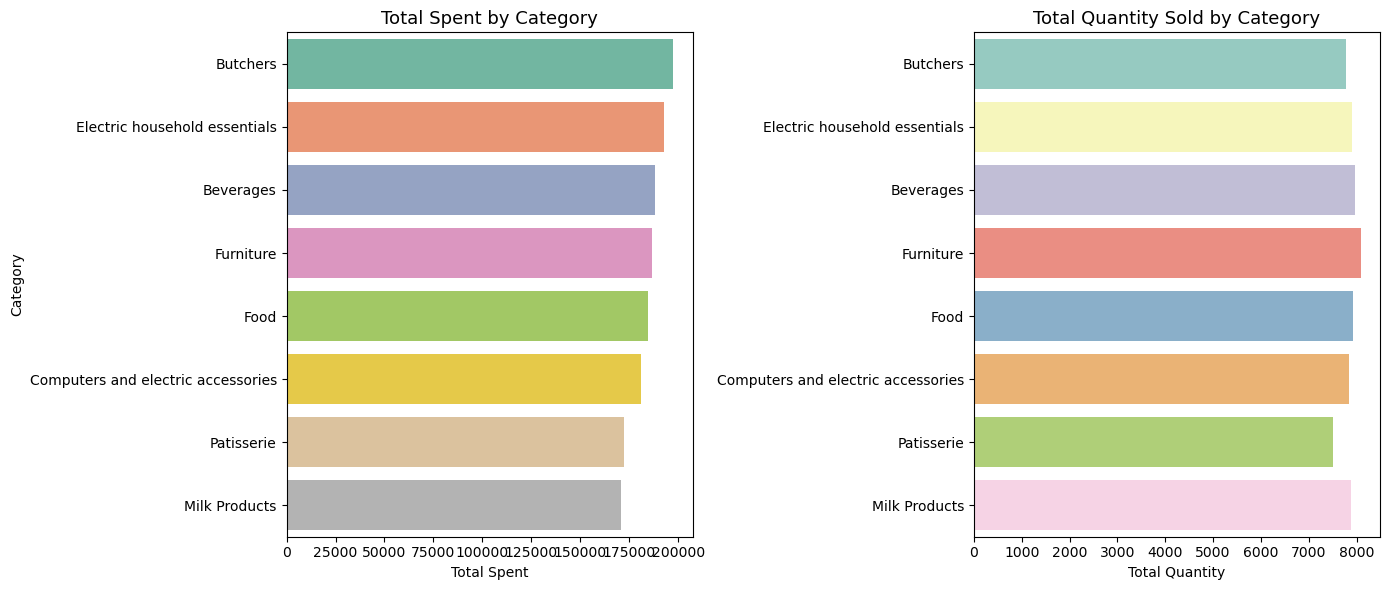

In [83]:
# Group the data
#Groups all transactions by Category, then sums the Total Spent to see total sales per category.sorts them in descending order (highest spend first).
category_spent = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
#Also groups by Category but sums up Quantity sold,Then uses .loc[category_spent.index] to match the same order as the previous variable,so both plots line up consistently.
category_quantity = df.groupby('Category')['Quantity'].sum().loc[category_spent.index]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left subplot: Total Spent by Category ---
sns.barplot(
    x=category_spent.values,
    y=category_spent.index,
    hue=category_spent.index,
    ax=axes[0],
    palette='Set2',
    legend=False
)
axes[0].set_title('Total Spent by Category', fontsize=13)
axes[0].set_xlabel('Total Spent')
axes[0].set_ylabel('Category')

# --- Right subplot: Quantity Sold by Category ---
sns.barplot(
    x=category_quantity.values,
    y=category_quantity.index,
    hue=category_quantity.index,
    ax=axes[1],
    palette='Set3',
    legend=False
)
axes[1].set_title('Total Quantity Sold by Category', fontsize=13)
axes[1].set_xlabel('Total Quantity')
axes[1].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Summary:
* two horizontal bargraph- used to compare numeric values for different category
* top graph:
    shows total amount of money spent for each category,shows where most revenue come from
* bottom graph:
    shows total quantity of items sold for each category,shows which categories sell most items
#### Purpose:
* helps identifying top performing categories
* used in visual story telling
* Highlights which categories are premium and which are mass-market.

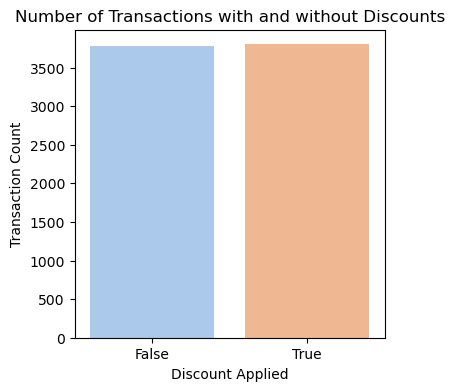

In [57]:
# Count Plot — How many transactions had discounts
plt.figure(figsize=(4,4))
sns.countplot(x='Discount Applied', data=df, hue='Discount Applied', palette='pastel', legend=False)
plt.title('Number of Transactions with and without Discounts')
plt.xlabel('Discount Applied')
plt.ylabel('Transaction Count')
plt.show()

#### SUmmary:
* Count Plot Shows:
    The number of transactions where a discount was applied (True) versus no discount (False).
* Each bar’s height represents how many transactions in your dataset have that value.
#### Purpose:
* Quickly shows how often discounts are used in transactions.
* Helps in marketing and pricing analysis:
    Are discounts used frequently?
    Do discounts play a big role in sales volume?
* Supports business decisions on whether to increase/decrease discount campaigns.
* Consider using discounts strategically to attract more customers when sales drop.

In [63]:
top_customers = df['Customer ID'].value_counts().head(10)
print(top_customers)

top_customer_data = df[df['Customer ID'].isin(top_customers.index)]

customer_item = top_customer_data.groupby(['Customer ID', 'Item']).size().reset_index(name='Purchase Count')


Customer ID
CUST_05    497
CUST_13    491
CUST_24    489
CUST_08    480
CUST_15    478
CUST_16    469
CUST_09    465
CUST_01    461
CUST_10    458
CUST_20    457
Name: count, dtype: int64


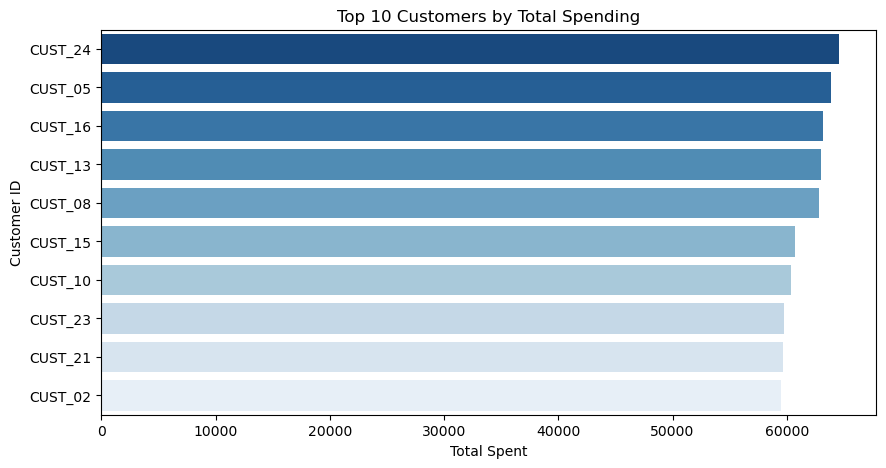

In [68]:
customer_spent = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=customer_spent.values,
    y=customer_spent.index,
    hue=customer_spent.index,   # use hue = y variable
    palette='Blues_r',
    legend=False
)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spent')
plt.ylabel('Customer ID')
plt.show()

#### Summary:
* Horizontal Bar Chart Showing The top 10 customers who spent the most money overall.
* CUST_24 has the largest bar, they are your highest-value customer.
* The gap between bars shows how spending varies among top customers.
#### Purpose:
* Helps identify loyal or high-value customers.
* Useful for customer segmentation- targeting top spenders for rewards or offers.

In [70]:
# the mean Price Per Unit for each category.

category_price = df.groupby('Category')['Price Per Unit'].mean().sort_values(ascending=False)
print(category_price.head(6))

Category
Butchers                              25.210415
Electric household essentials         24.326722
Beverages                             23.329012
Furniture                             23.269178
Food                                  23.188289
Computers and electric accessories    23.144953
Name: Price Per Unit, dtype: float64


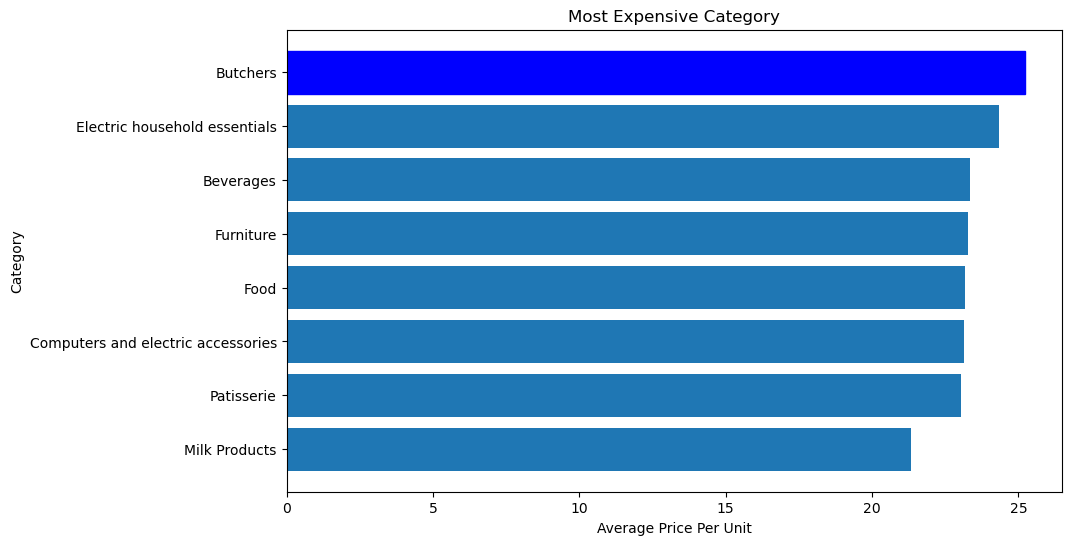

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=category_price.values,
    y=category_price.index,
    hue=category_price.index,
    palette='Blues',
    legend=False
)


# Highlight the most expensive category in blue
bars = plt.barh(category_price.index, category_price.values)
bars[0].set_color('blue')  # since it's sorted descending, first one is the highest

plt.title('Most Expensive Category')
plt.xlabel('Average Price Per Unit')
plt.ylabel('Category')
plt.show()

#### Summary:
* Horizontal Bar Chart Showing The average unit price of products in each category.
* The top bar (in blue) = category with the highest average price — your most expensive category.
* The remaining bars show other categories in descending price order.
#### Purpose:
* Helps identify which product categories are premium-priced vs. budget-friendly.
* Useful for pricing strategy, profitability analysis, and customer segmentation (who buys high-priced items).
* Can guide inventory or promotion decisions — e.g., promote high-margin expensive items.

# TASK 4: Documentation, Insights & Presentation
### Key Findings:

* Butchers, Electronic Household Essentials, and Beverages lead in total sales.
* Digital payments are growing and nearly equal to cash usage.
* High-value transactions exist as outliers — possibly bulk or premium sales.
* Total Spent is highly influenced by both price and quantity sold.
* Only a small percentage of transactions include discounts.
* Top customers drive a large portion of total revenue.
* Most expensive categories should be managed carefully for pricing and stock control.

### Recommendations & Next Steps

* Focus on high-revenue categories — maintain supply and consider premium promotions.
* Introduce loyalty rewards for top customers to encourage repeat purchases.
* Monitor outliers — verify high-spend transactions and understand their causes.
* Leverage seasonal trends — plan marketing or inventory around high-demand months.
* Encourage digital payments through small incentives or cashback offers.
* Use pricing analysis to adjust profit margins in low-performing categories.